In [6]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pycaret
from sklearn.model_selection import train_test_split
from pycaret.classification import *
from sklearn.metrics import average_precision_score


In [7]:
df = pd.read_csv('try_data/final_data.csv')

train_set, test_set = train_test_split(df, test_size=0.2, random_state=0, stratify=df["Target"])

In [8]:
#### AutoML

add_metric('apc', 'PR_AUC', average_precision_score, target = 'pred_proba')
experiment = setup(data = train_set, target = 'Target',
                   session_id=5636, fix_imbalance=True)                                 
                   



,Description,Value
0,session_id,5636
1,Target,Target
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(47371, 20)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best_model = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9556,0.9807,0.8341,0.9680,0.8960,0.8680,0.8720,19.7570
et,Extra Trees Classifier,0.9346,0.9710,0.7719,0.9308,0.8439,0.8030,0.8086,33.5450
knn,K Neighbors Classifier,0.8894,0.9618,0.9396,0.6902,0.7958,0.7224,0.7386,18.0100
dt,Decision Tree Classifier,0.8995,0.8671,0.8071,0.7671,0.7864,0.7208,0.7213,6.6400
lightgbm,Light Gradient Boosting Machine,0.8237,0.8549,0.5291,0.6397,0.5791,0.4689,0.4723,6.4720
xgboost,Extreme Gradient Boosting,0.8075,0.8372,0.4955,0.5969,0.5413,0.4208,0.4238,119.4220
gbc,Gradient Boosting Classifier,0.7512,0.8109,0.6522,0.4696,0.5460,0.3809,0.3907,32.6080
lr,Logistic Regression,0.7080,0.8030,0.7534,0.4233,0.5420,0.3516,0.3832,71.3410
lda,Linear Discriminant Analysis,0.7035,0.7956,0.7493,0.4183,0.5368,0.3436,0.3753,18.5030
ada,Ada Boost Classifier,0.7347,0.7907,0.6453,0.4459,0.5273,0.3514,0.3630,11.3430


In [10]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5636, verbose=0,
                       warm_start=False)

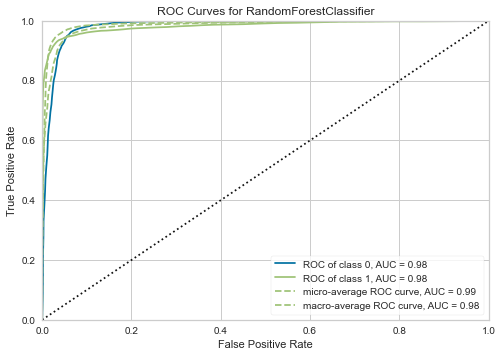

In [11]:
plot_model(best_model, plot = 'auc')

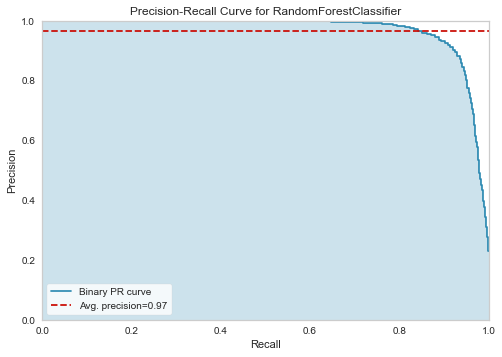

In [12]:
plot_model(best_model, plot = 'pr')

In [13]:
# uncertainty
rf = create_model('rf')

# from best model
final_model = finalize_model(best_model)

final_predictions = predict_model(final_model, data=test_set)

final_predictions['N_score'] = final_predictions['Score'] 

for i in final_predictions.index:
    if final_predictions.loc[i,'Label'] == '0.0':
        final_predictions.loc[i,'N_score'] = 1 - final_predictions.loc[i,'Score']

final_predictions.head()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9566,0.9833,0.8434,0.9625,0.8990,0.8715,0.8746
1,0.9608,0.9776,0.8513,0.9744,0.9087,0.8839,0.8872
2,0.9557,0.9797,0.8303,0.9723,0.8957,0.8677,0.8721
3,0.9484,0.9789,0.8158,0.9524,0.8788,0.8463,0.8504
4,0.9551,0.9804,0.8303,0.9693,0.8944,0.8661,0.8703
5,0.9593,0.9850,0.8487,0.9699,0.9053,0.8795,0.8827
6,0.9587,0.9812,0.8436,0.9727,0.9036,0.8775,0.8811
7,0.9527,0.9738,0.8160,0.9734,0.8878,0.8581,0.8634
8,0.9551,0.9822,0.8318,0.9679,0.8947,0.8663,0.8704
9,0.9541,0.9853,0.8303,0.9648,0.8925,0.8636,0.8675


,RIAGENDR,RIDAGEYR,INDHHIN2,DBQ095Z,DRQSPREP,DRD340,DRD360,DRQSDIET,BPACSZ,BPXML1,...,LBXHBS,LBDMONO,LBDBANO,LBXGH,Target,OCD150,RXDDRGID,Label,Score,N_score
26801,2.0,80.0,8.0,1.0,2.0,1.0,1.0,1.0,4.0,170.0,...,2.0,0.8,5.397605e-79,5.6,1.0,4.0,b'd00746',1.0,0.67,0.67
53757,1.0,24.0,15.0,1.0,1.0,1.0,2.0,1.0,4.0,130.0,...,1.0,1.1,1.000000e-01,5.0,0.0,1.0,b'd04115',0.0,0.97,0.03
33278,2.0,61.0,5.0,4.0,4.0,1.0,1.0,2.0,3.0,160.0,...,2.0,0.5,5.397605e-79,4.7,0.0,1.0,b'd00140',0.0,0.99,0.01
19180,1.0,80.0,5.0,1.0,4.0,1.0,2.0,2.0,4.0,150.0,...,2.0,0.6,5.397605e-79,5.0,0.0,4.0,b'd00325',0.0,0.80,0.20
52426,2.0,72.0,15.0,3.0,4.0,1.0,1.0,2.0,3.0,130.0,...,2.0,0.8,1.000000e-01,5.3,1.0,4.0,b'd04105',1.0,0.62,0.62


In [14]:
from pycaret.utils import check_metric
check_metric(final_predictions['Target'], final_predictions['N_score'], metric = 'AUC')

0.9875

In [15]:
from sklearn.metrics import average_precision_score

AUC_PR = average_precision_score(final_predictions['Target'], final_predictions['N_score'])
AUC_PR

0.9775452768300559